# Data analysis for SPT data

In [1]:
from ipywidgets import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from module.preprocessing import preprocessing, get_groundtruth_with_label
from module.fileIO.DataLoad import read_multiple_csv, read_multiple_h5s

# Option settings for data analysis.

In [2]:
PIXELMICRONS = 0.16
FRAMERATE = 0.01
CUTOFF = 5
FOLDER = 'condition2'
number_of_bins = 50
figure_resolution_in_dpi = 128
figure_font_size = 20

In [3]:
def curve(time, k, alpha):
    return k * time**alpha * 4

# preprocessing generates 7 data.
### @params: data folder path, pixel microns, frame rate, cutoff
### @output: DataFrame, DataFrame, ndarray, networkx grpah, DataFrame, DataFrame, list

# preprocessing includes below steps.
### 1. exclude the trajectory where length is shorter than CUTOFF
### 2. convert from pixel unit to micrometer unit with PIXELMICRONS and FRAMERATE
### 3. generate 4 DataFrames, 1 ndarray representation of markovchain, 1 graph respresentation of markovchain, 1 list containing states

In [4]:
original_data = read_multiple_h5s(path=FOLDER)
analysis_data1, analysis_data2, state_markov, state_graph, msd, tamsd, states = preprocessing(data=original_data, pixelmicrons=PIXELMICRONS, framerate=FRAMERATE, cutoff=CUTOFF)
#analysis_data1, analysis_data2, state_markov, state_graph, msd, tamsd, states = get_groundtruth_with_label(data=original_data, label_folder='dummy', pixelmicrons=PIXELMICRONS, framerate=FRAMERATE, cutoff=CUTOFF)

** Computing of Ensemble-averaged TAMSD takes a few minutes **


Analysis: 100%|█████████████████████████████████████████████████████████████| 1192/1192 [03:23<00:00,  5.87trajectory/s]


** preprocessing finished **


From here, we treat data to make plots or print results. <br>
Data is stored as <br>
1. analysis_data1(DataFrame: contains data of mean_jump_distance, K, alpha, state, length, traj_id) <br>
2. analysis_data2(DataFrame: contains data of displacments, state) <br>
3. state_markov(matrix: contains transition probability) <br>
4. state_graph(network: built from transitions between states(weight: nb of occurence of transitions)) <br>
5. msd(DataFrame: contains msd for each state.) <br>
6. tamsd(DataFrame: contains ensemble-averaged tamsd for each state.) <br>
-> ref: https://www.researchgate.net/publication/352833354_Characterising_stochastic_motion_in_heterogeneous_media_driven_by_coloured_non-Gaussian_noise <br>
-> ref: https://arxiv.org/pdf/1205.2100 <br>
7. classified states beforehand with BI-ADD or other tools. <br>

Units: 
K: generalized diffusion coefficient, um^2/s^alpha <br>
alpha: anomalous diffusion exponent, real number between 0 and 2 <br>
mean_jump_disatnce: average of jump distances of single trajectory <br>
state: states defined in BI-ADD <br>
length: length of trajectory, second <br>
displacements: displacements of all trajectories, um <br>

In [5]:
print(f'\nanalysis_data1:\n', analysis_data1)
print(f'\nanalysis_data2:\n', analysis_data2)
print(f'\nMSD:\n', msd)
print(f'\nEnsemble-averaged TAMSD:\n', tamsd)


analysis_data1:
       mean_jump_d        K    alpha  state  length          traj_id
0        0.262688  0.75304  1.09153      0    0.44   trajs_fov_18_0
1        0.051946  0.02816  0.22151      1    0.36   trajs_fov_18_1
2        0.277908  0.90787  1.12493      0    0.62   trajs_fov_18_2
3        0.049419  0.03041  0.04395      1    1.38   trajs_fov_18_2
4        0.279790  0.95590  1.21858      0    0.17   trajs_fov_18_3
...           ...      ...      ...    ...     ...              ...
2094     0.044058  0.02266  0.08553      1    1.93  trajs_fov_20_31
2095     0.305377  1.19076  1.02427      0    0.07  trajs_fov_20_32
2096     0.039505  0.01815  0.07420      1    1.93  trajs_fov_20_32
2097     0.276362  0.94568  1.07077      0    0.84  trajs_fov_20_33
2098     0.082173  0.08002  0.15787      1    1.16  trajs_fov_20_33

[2099 rows x 6 columns]

analysis_data2:
         displacements  state
0            0.071990      0
1            0.217073      0
2            0.216792      0
3      

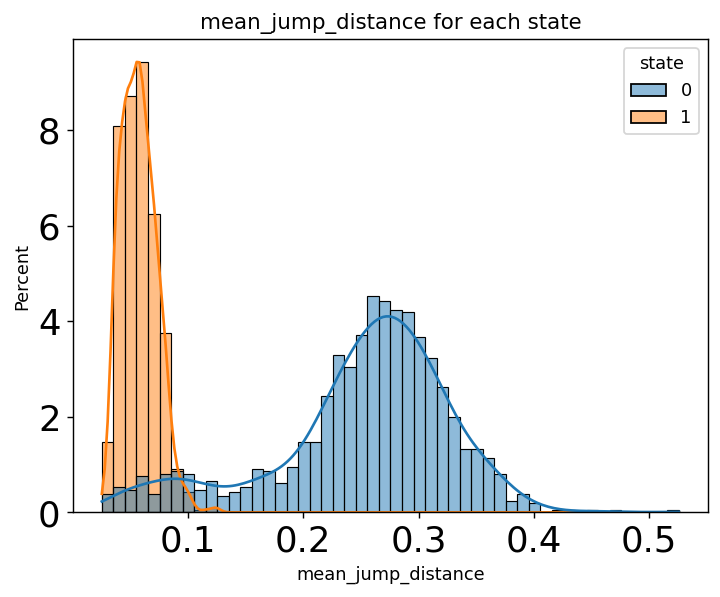

In [6]:
#p1: kde(kernel density estimation) plot of mean jump distance grouped by state.
plt.figure(f'p1', dpi=figure_resolution_in_dpi)
p1 = sns.histplot(analysis_data1, x=f'mean_jump_d', stat='percent', hue='state', bins=number_of_bins, kde=True)
plt.xlabel(f'mean_jump_distance')
p1.set_title(f'mean_jump_distance for each state')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size)
plt.show()

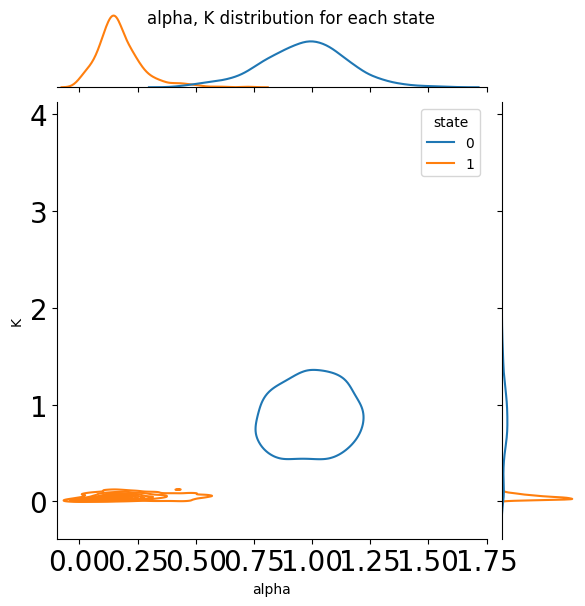

In [7]:
#p2: joint distribution plot(kde) of alpha(x-axis) and K(y-axis) for each state
p2 = sns.jointplot(data=analysis_data1, x=f"alpha", y=f"K", kind='kde', hue='state')
plt.xlabel(f'alpha')
plt.ylabel(f'K')
p2.fig.suptitle(f'alpha, K distribution for each state')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size)
plt.show()

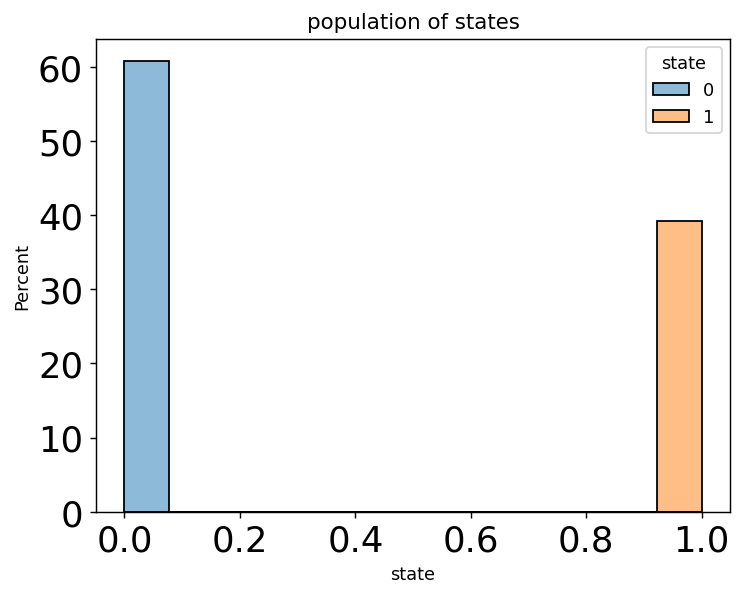

In [8]:
#p3: histogram of states
plt.figure(f'p3', dpi=figure_resolution_in_dpi)
p3 = sns.histplot(data=analysis_data1, x="state", stat='percent', hue='state')
p3.set_title(f'population of states')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size)
plt.show()

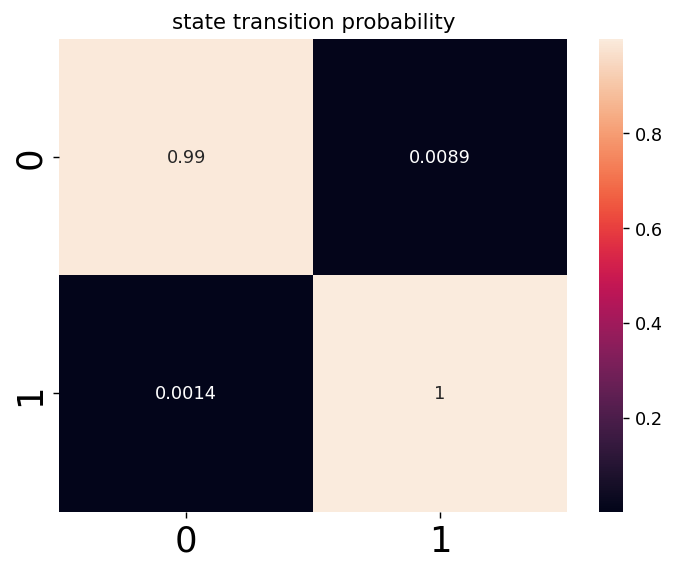

In [9]:
#p4: state transition probability
plt.figure(f'p4', dpi=figure_resolution_in_dpi)
p4 = sns.heatmap(state_markov, annot=True)
p4.set_title(f'state transition probability')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size)
plt.show()

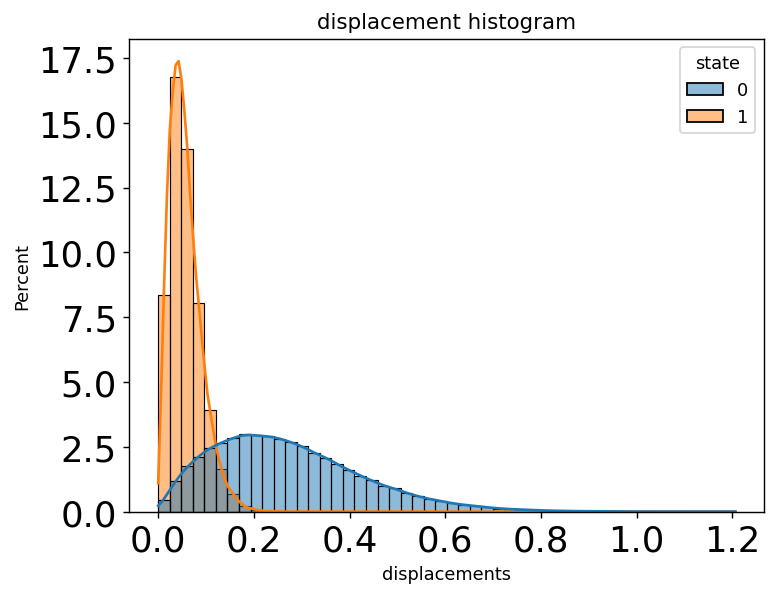

In [10]:
#p5: displacement histogram
plt.figure(f'p5', dpi=figure_resolution_in_dpi)
p5 = sns.histplot(data=analysis_data2, x='displacements', stat='percent', hue='state', bins=number_of_bins, kde=True)
p5.set_title(f'displacement histogram')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size)
plt.show()

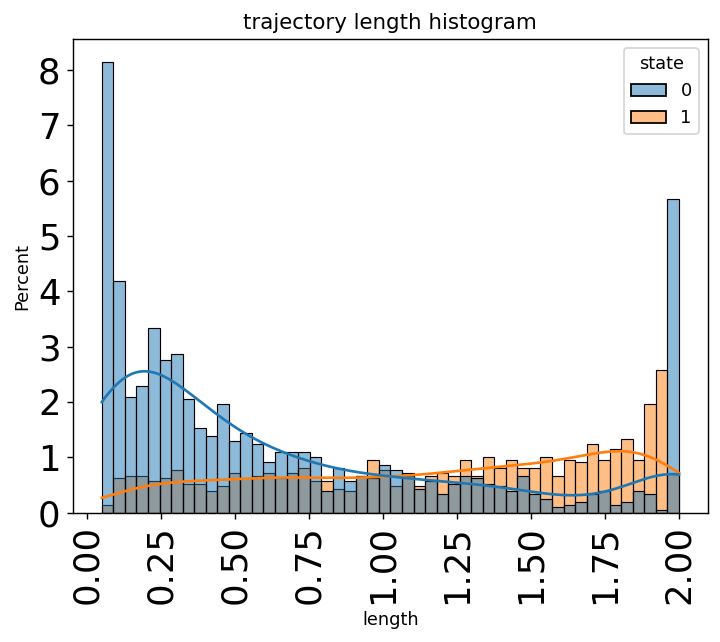

In [11]:
#p6: trajectory length(frame) histogram
plt.figure(f'p6', dpi=figure_resolution_in_dpi)
p6 = sns.histplot(data=analysis_data1, x='length', stat='percent', hue='state', bins=number_of_bins, kde=True)
p6.set_title(f'trajectory length histogram')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size)
plt.xticks(rotation=90)
plt.show()

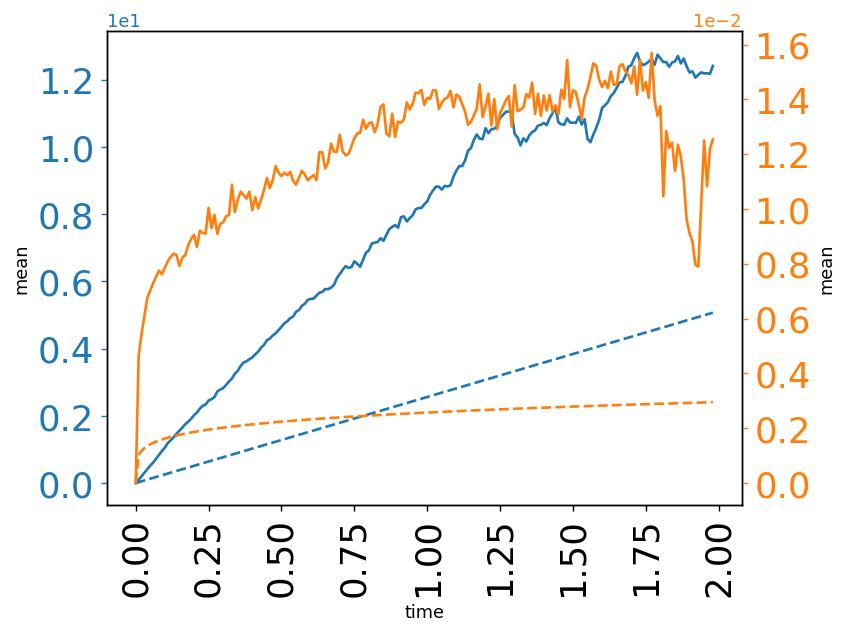

In [12]:
#p7: MSD
plt.figure(f'p7', dpi=figure_resolution_in_dpi)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
p7 = sns.lineplot(data=msd, x=msd['time'][msd['state']==0], y=msd['mean'][msd['state']==0], c='C0')
p7.plot(msd['time'][msd['state']==0], curve(msd['time'][msd['state']==0], 1 * ((PIXELMICRONS**2)/FRAMERATE), 1) / 4, linestyle='dashed', c='C0')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size, rotation=90)
p7_ax2= p7.twinx()
plt.ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
sns.lineplot(data=msd, x=msd['time'][msd['state']==1], y=msd['mean'][msd['state']==1], c='C1', ax=p7_ax2)
p7_ax2.plot(msd['time'][msd['state']==1], curve(msd['time'][msd['state']==1], 0.01 * ((PIXELMICRONS**2)/FRAMERATE**0.2), 0.2), linestyle='dashed', c='C1')
plt.yticks(fontsize=figure_font_size)
p7.tick_params(axis='y', colors='C0')
p7_ax2.tick_params(axis='y', colors='C1')
#p7.set_title(f'MSD')
plt.xticks(fontsize=figure_font_size)
for state_idx, state in enumerate(states):
    # lower, upper bound related to the number of data (TODO: testing now)
    msd_per_state = msd[msd['state'] == state].sort_values('time')
    mus = msd_per_state['mean']
    sigmas = msd_per_state['std']
    lower_bound = [mu - sigma for mu, sigma in zip(mus, sigmas)]
    upper_bound = [mu + sigma for mu, sigma in zip(mus, sigmas)]
    #plt.fill_between(msd_per_state['time'], lower_bound, upper_bound, alpha=.3, color=f'C{state_idx}')
#plt.xlim([0, 1.0])
plt.savefig('msd.png')
plt.show()

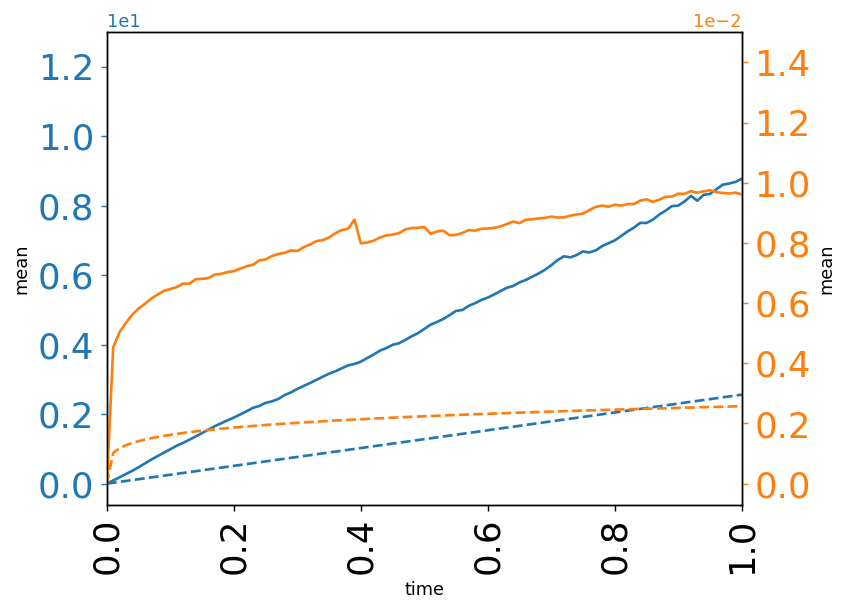

In [13]:
#p8: Ensemble-averaged TAMSD
plt.figure(f'p8', dpi=figure_resolution_in_dpi)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
p8 = sns.lineplot(data=tamsd, x=tamsd['time'][tamsd['state']==0], y=tamsd['mean'][tamsd['state']==0], c='C0')
p8.plot(tamsd['time'][tamsd['state']==0], curve(tamsd['time'][tamsd['state']==0], 1 * ((PIXELMICRONS**2)/FRAMERATE), 1) / 4, linestyle='dashed', c='C0')
plt.yticks(fontsize=figure_font_size)
plt.xticks(fontsize=figure_font_size, rotation=90)
p8_ax2= p8.twinx()
plt.ticklabel_format(axis='both', style='sci', scilimits=(-1,1))
sns.lineplot(data=tamsd, x=tamsd['time'][tamsd['state']==1], y=tamsd['mean'][tamsd['state']==1], c='C1', ax=p8_ax2)
p8_ax2.plot(tamsd['time'][tamsd['state']==1], curve(tamsd['time'][tamsd['state']==1], 0.01 * ((PIXELMICRONS**2)/FRAMERATE**0.2), 0.2), linestyle='dashed', c='C1')
plt.yticks(fontsize=figure_font_size)
p8.tick_params(axis='y', colors='C0')
p8_ax2.tick_params(axis='y', colors='C1')
#p8.set_title(f'Ensemble-averaged TAMSD')
plt.xticks(fontsize=figure_font_size)

for state_idx, state in enumerate(states):
    # lower, upper bound related to the number of data (TODO: testing now)
    tamsd_per_state = tamsd[tamsd['state'] == state].sort_values('time')
    mus = tamsd_per_state['mean']
    sigmas = tamsd_per_state['std']
    lower_bound = [mu - sigma for mu, sigma in zip(mus, sigmas)]
    upper_bound = [mu + sigma for mu, sigma in zip(mus, sigmas)]
    #plt.fill_between(tamsd_per_state['time'], lower_bound, upper_bound, alpha=.3, color=f'C{state_idx}')
plt.xlim([0, 1.0])
plt.savefig('tamsd.png')
plt.show()